
Project 2. Heart Disease Prediction


In [ ]:

#EDA
#Data analysis -- shape, info, describe, corr etc
#duplicate values detection
#outlier detection
#visualiaztion
#Supervised model building part -- classification data
#Independent and dependent column
#divide our data into train, test split
#create our model
#train our model
#test our model
#performance of the model --- accuracy score, confusion, classification report

**Importing the data**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data=pd.read_csv('/content/heart_raw_data.csv')

In [9]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [12]:
data.sum()

age         16473.0
sex           207.0
cp            293.0
trestbps    39882.0
chol        74618.0
fbs            45.0
restecg       160.0
thalach     45343.0
exang          99.0
oldpeak       315.0
slope         424.0
ca            221.0
thal          701.0
target        165.0
dtype: float64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
data.shape

(303, 14)

In [ ]:
#how to treat the null values
#replace/drop the null values (mean,median, mode)

In [17]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [41]:
col=list(data.columns)

In [42]:
col

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [ ]:
#value_counts, unique and nunique


In [20]:
#value_counts
data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [22]:
#unique
data["target"].unique()

array([1, 0])

In [23]:
#nunique
data['target'].nunique()

2

In [25]:
#find out how many people have chol value more than 300
#in this case we can see 43 patiants are whose having heart diseases and also chol level value > 300
data[data['chol']>300].shape

(43, 14)

In [26]:
data[data['chol']>300].count()

age         43
sex         43
cp          43
trestbps    43
chol        43
fbs         43
restecg     43
thalach     43
exang       43
oldpeak     43
slope       43
ca          43
thal        43
target      43
dtype: int64

In [ ]:
#find out how many people have chol value more than 300 and the age is greater than 40

In [27]:
data[(data['chol']>300) & (data['age']>40)].shape

(42, 14)

In [28]:
data.loc[(data['chol']>300)&data['age']>40]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [30]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [31]:
#check how many people actually having a heart disease whose thal is reversable
data[data['target']==1].shape

(165, 14)

In [32]:
#statistical summary of dataset
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Text(0.5, 1.0, 'Age distribution')

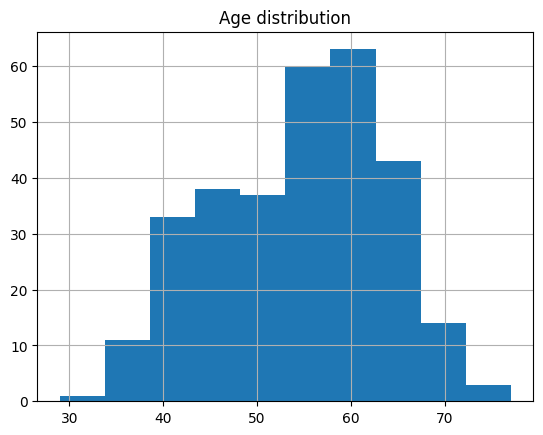

In [33]:
#Histogram
data['age'].hist(grid=True)
plt.title('Age distribution')

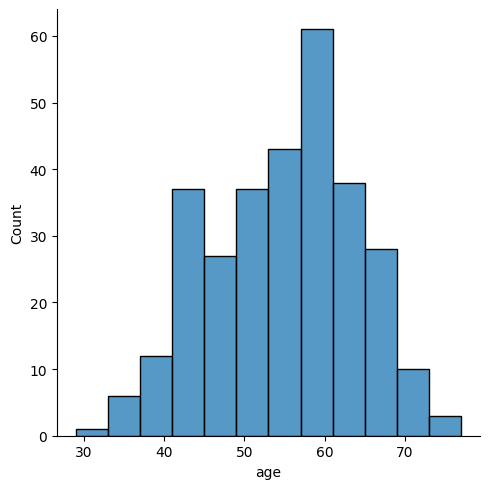

In [34]:
sns.displot(data['age'])

<ipython-input-36-67f5a22b11e7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


<Axes: xlabel='age', ylabel='Density'>

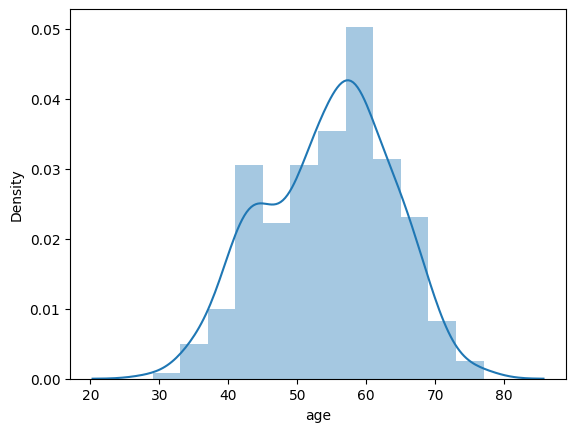

In [36]:
#Bell curve line on the histogram
sns.distplot(data['age'])

<Axes: xlabel='age', ylabel='Density'>

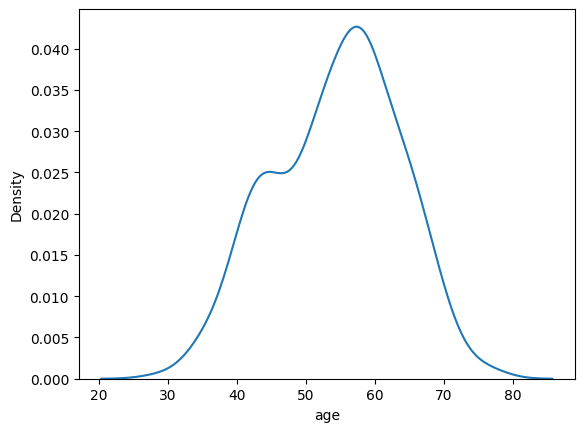

In [37]:
#no histagram behind only bell curve exist
sns.kdeplot(data['age'])

In [38]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<ipython-input-40-6c264d81b554>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['sex']==1]['age'],label='male')
<ipython-input-40-6c264d81b554>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['sex']==1]['age'],label='female')


Text(0.5, 1.0, 'Density plot of age by sex')

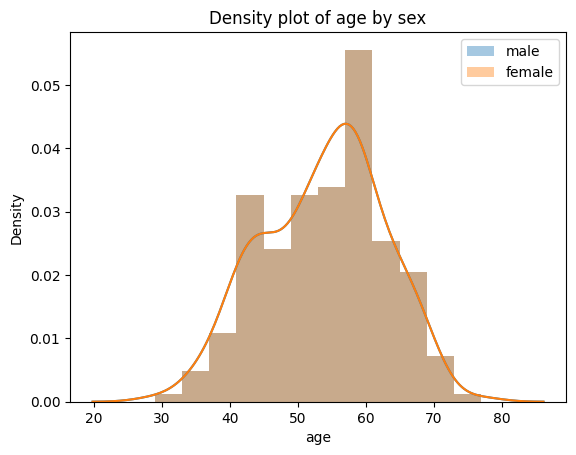

In [40]:
sns.distplot(data[data['sex']==1]['age'],label='male')
sns.distplot(data[data['sex']==1]['age'],label='female')
plt.legend()
plt.title('Density plot of age by sex')


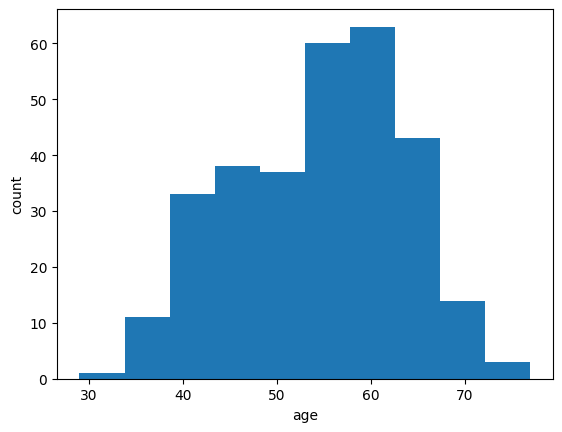

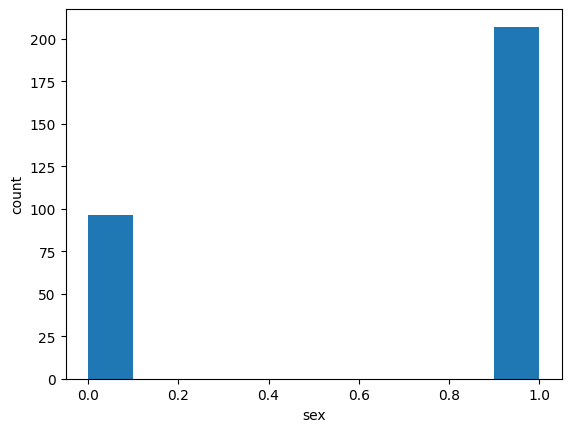

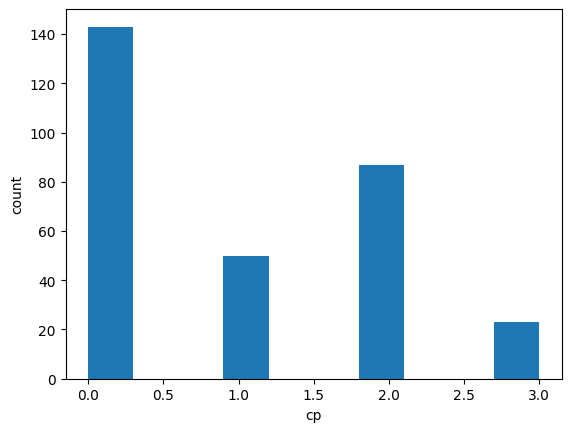

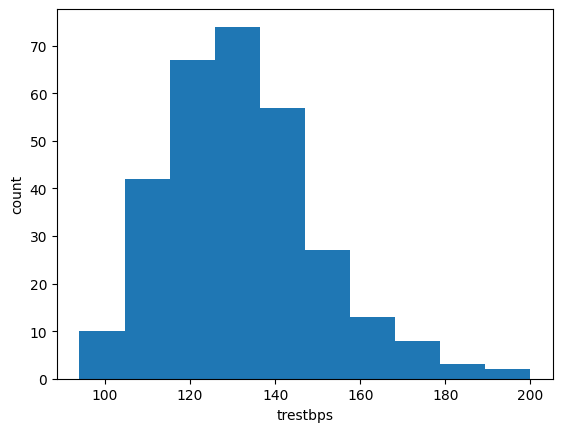

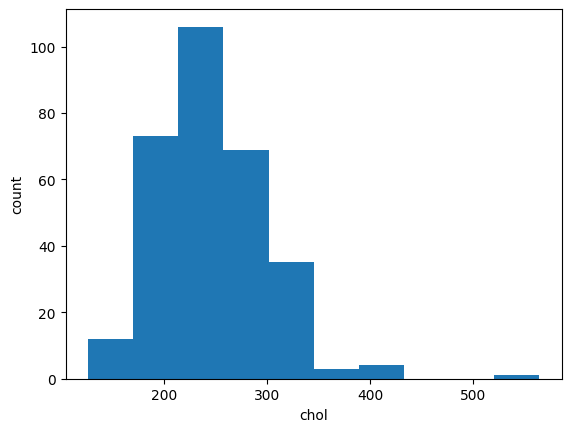

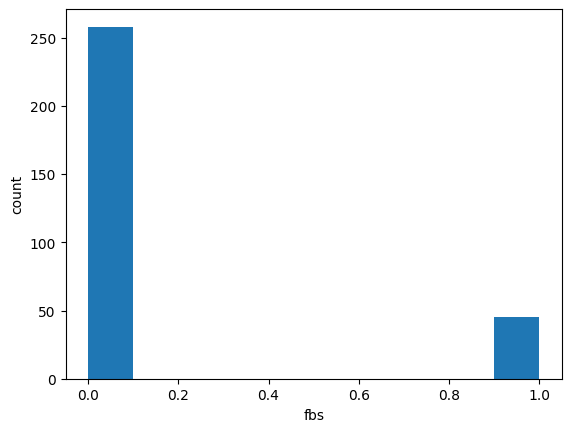

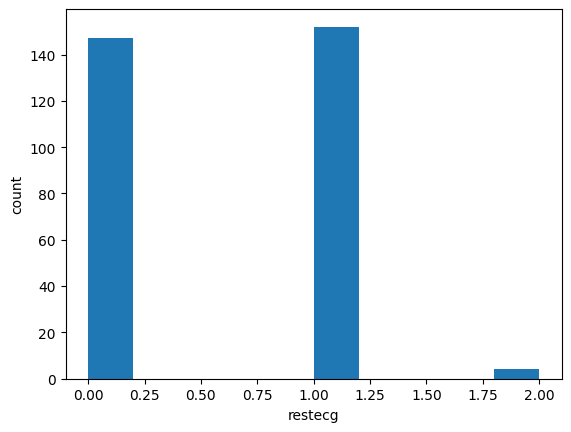

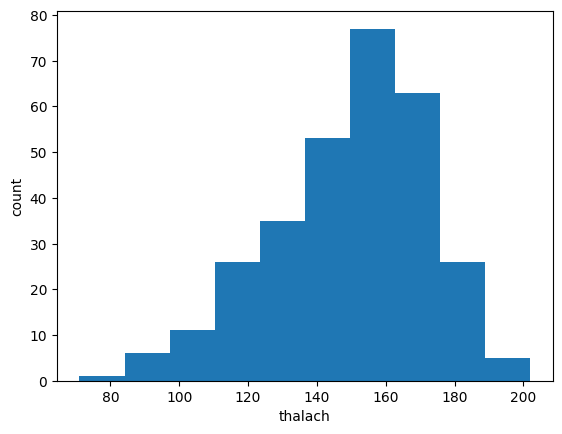

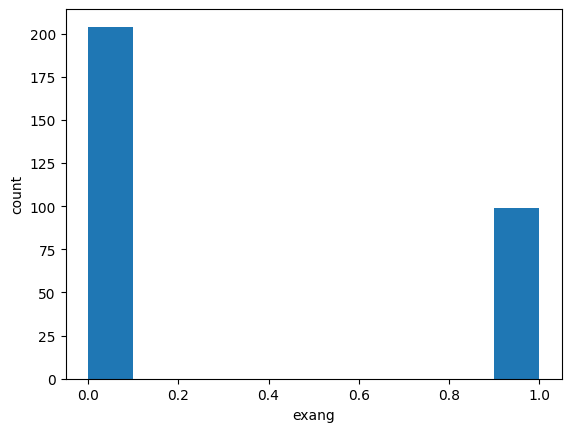

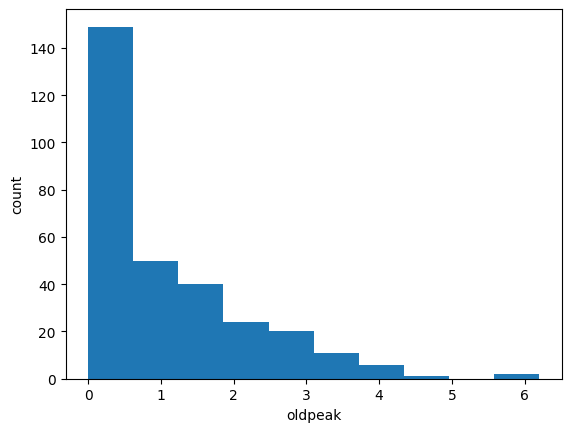

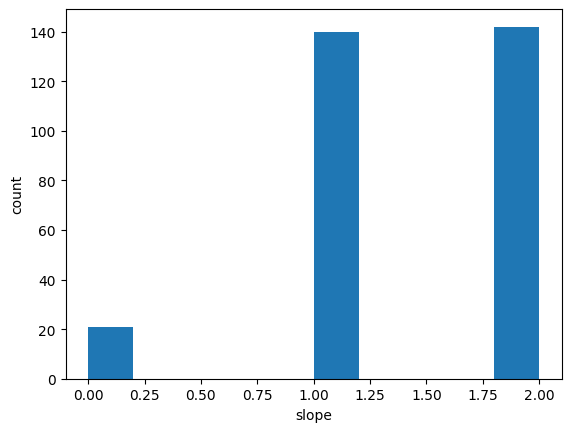

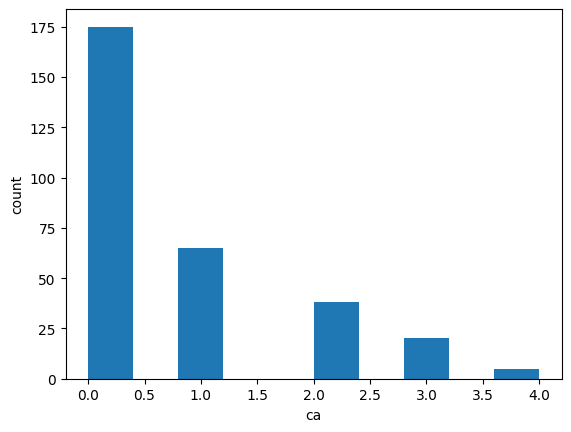

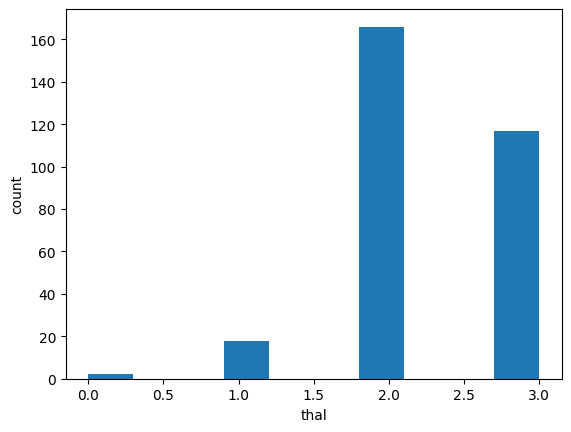

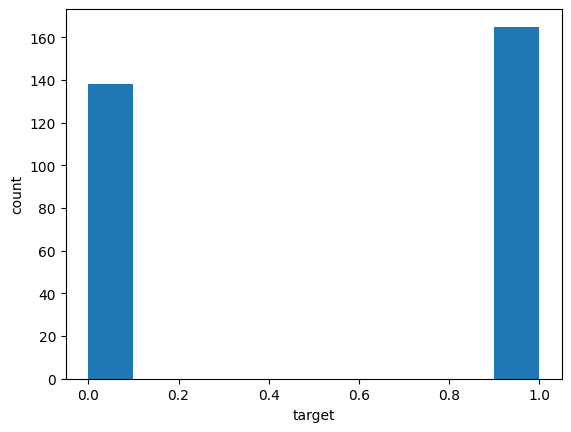

In [44]:
import matplotlib.pyplot as plt

for col_name in col:
    if data[col_name].dtypes == 'int64' or data[col_name].dtypes == 'float64':
        plt.hist(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()


<Axes: >

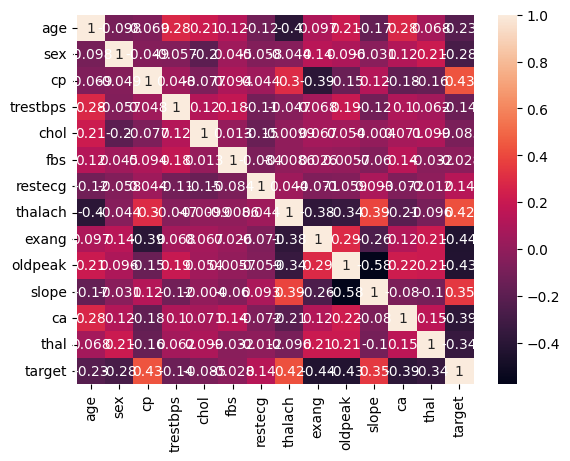

In [45]:
#inference- trestbps and chol has approximately normal distribution
#to check correlation by use of heatmap
sns.heatmap(data.corr(),annot = True)

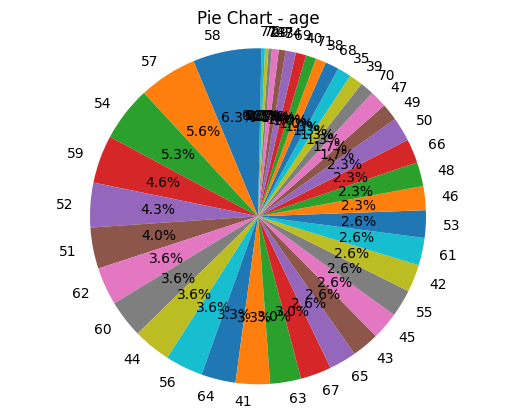

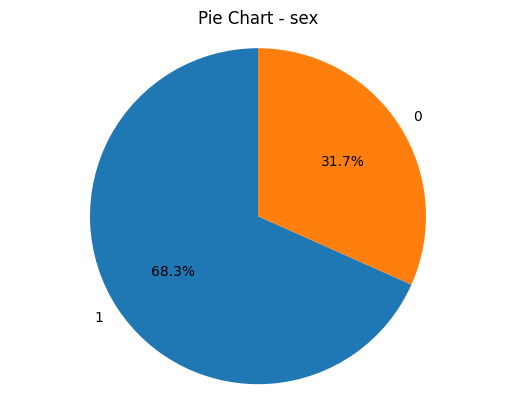

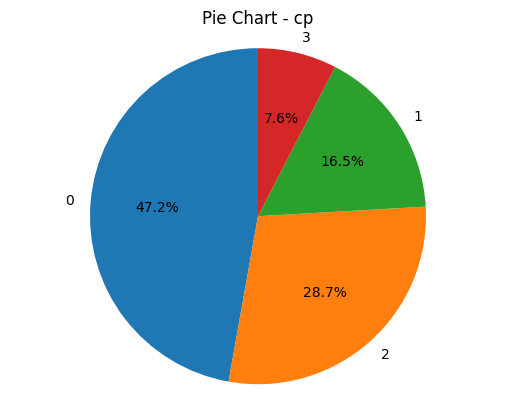

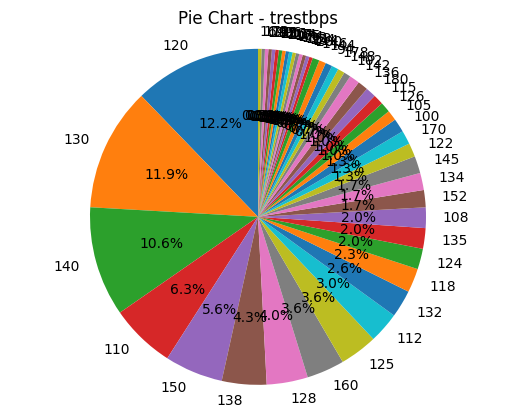

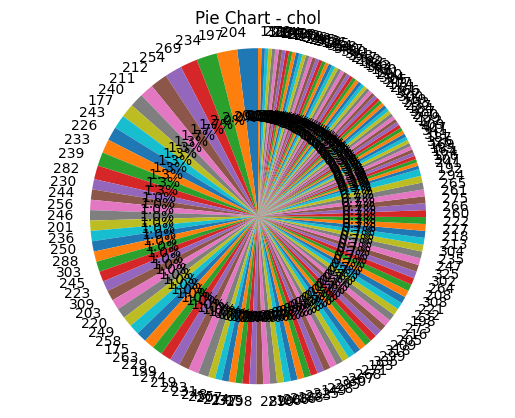

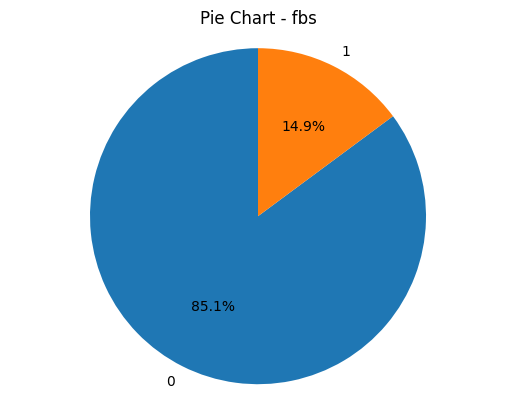

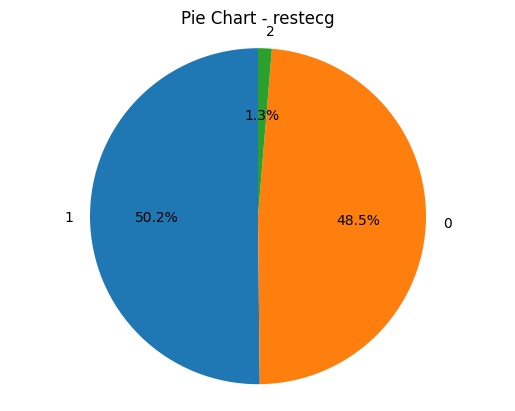

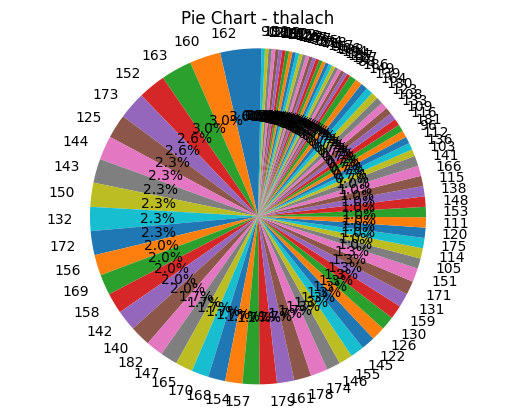

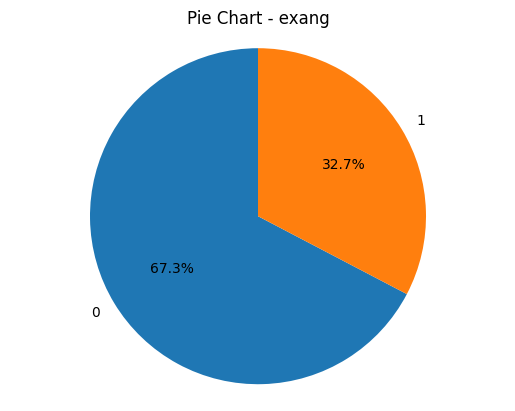

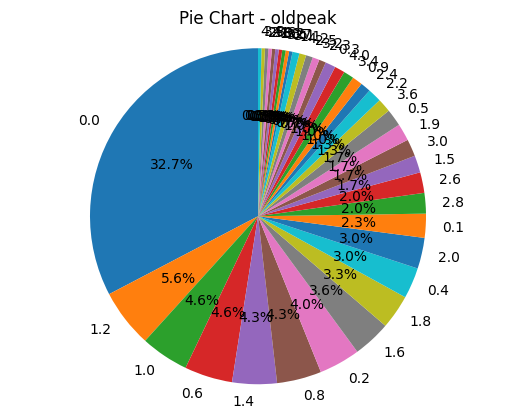

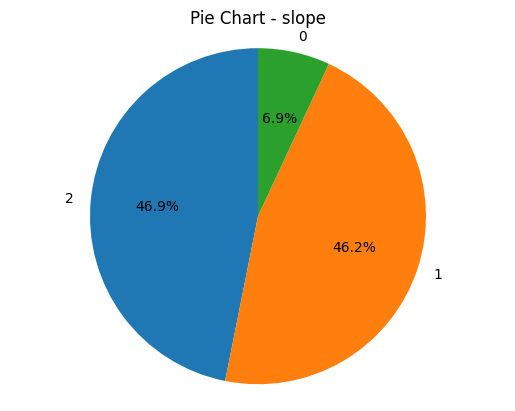

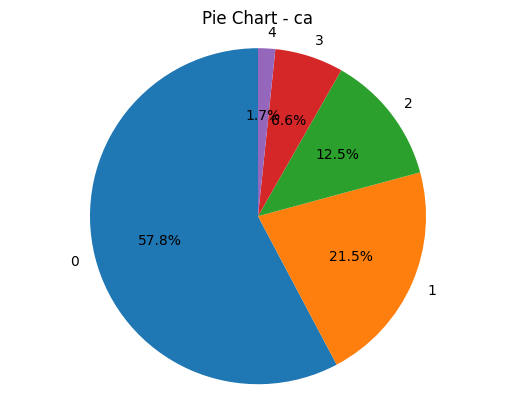

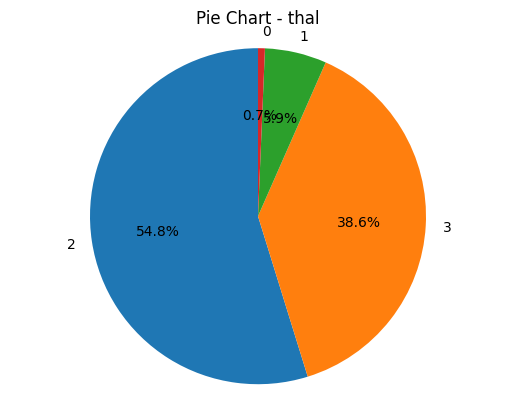

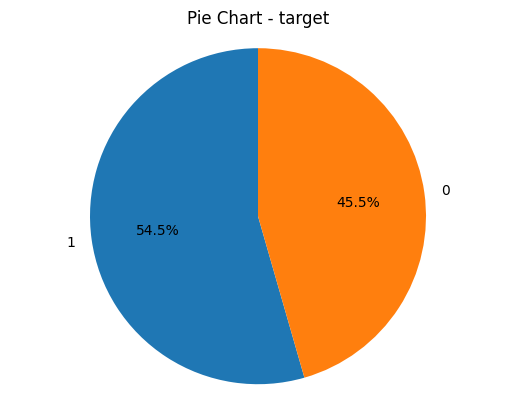

In [46]:
import matplotlib.pyplot as plt

for col_name in data.columns:
    if data[col_name].dtype == 'int64' or data[col_name].dtype == 'float64':

        value_counts = data[col_name].value_counts()

        labels = value_counts.index
        frequencies = value_counts.values

        plt.figure()
        plt.pie(frequencies, labels=labels, autopct='%1.1f%%', startangle=90)
        plt.axis('equal')
        plt.title(f'Pie Chart - {col_name}')
        plt.show()


<Axes: >

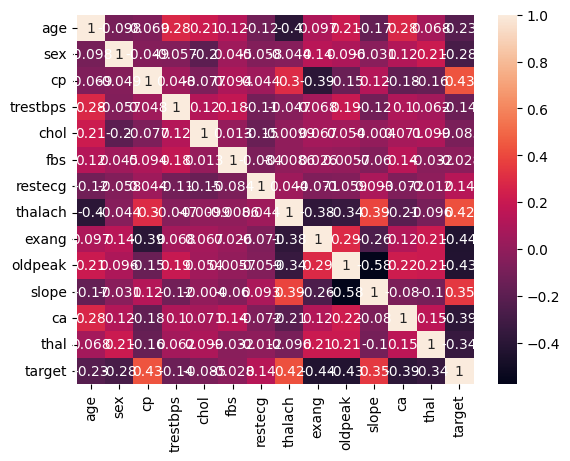

In [47]:
#to check correlation by using heat map
sns.heatmap(data.corr(), annot = True)

<Axes: xlabel='target', ylabel='count'>

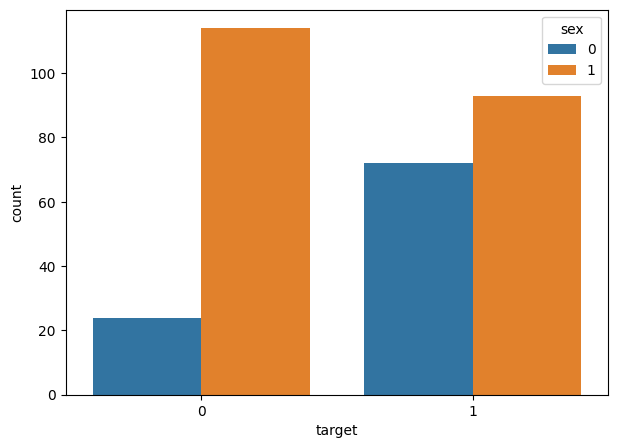

In [50]:
# if i want to check how many females and males having heart diseases
plt.rcParams['figure.figsize'] = (7,5)
sns.countplot(x='target', hue = 'sex', data = data)

In [51]:
x=data.iloc[:,:-1]
y=data['target']

In [52]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [54]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)


In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
from sklearn import tree


In [57]:
clf=tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [58]:
pred=clf.predict(x_test)
pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0])

In [59]:
y_test

225    0
152    1
228    0
201    0
52     1
      ..
253    0
293    0
76     1
272    0
238    0
Name: target, Length: 91, dtype: int64

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [61]:
accuracy_score (pred, y_test)

0.7362637362637363

In [62]:
c_parameter_name = 'max_depth'
c_parameter_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

df1=pd.DataFrame(columns=['max_depth','accuracy'])
df1

,max_depth,accuracy
